# Unidade 1 Trabalho 4:
#### Discente: Gabriel Vitor Pereira dos Santos

* Objetivo do Trabalho: Utilizar as métricas usadas na aula passada, que são:
1. Cycles;
2. Average Shortest Path Length;
3. Diameter of Network;
4. Shortest Path Length;
5. Connected Components;
6. Giant Connected Components;
7. number connected components;
8. BFS, DFS, SCC, WCC;
9. Clustering Coefficient.


#Aqui abaixo temos apenas o gráfico gerado da cidade de Natal-RN.

<ipython-input-6-7d753a7d599a>:11: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


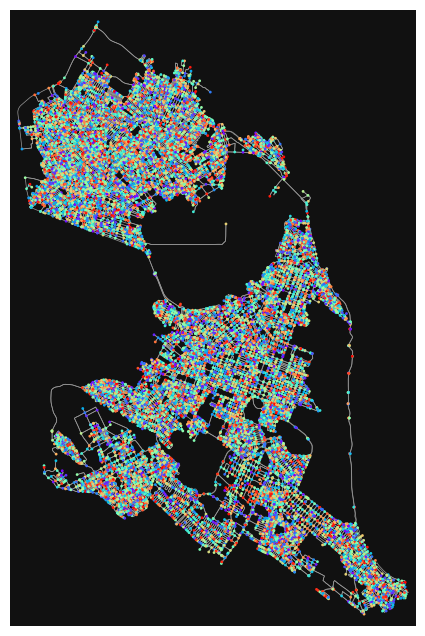

In [ ]:
# 1. Instalar as bibliotecas necessárias
!pip install osmnx networkx matplotlib

# 2. Importar as bibliotecas
import osmnx as ox
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm

# Configuração do OSMnx
ox.config(use_cache=True, log_console=True)

# 3. Baixar e plotar a rede de Natal-RN
place = "Natal, Brazil"
G = ox.graph_from_place(place, network_type="drive")

#4.1 Colocar o gráfico no modo "Arco-Íris"
node_colors = [cm.rainbow(random.random()) for _ in range(len(G.nodes))]

# 4.2 Plotar a rede com cores personalizadas
fig, ax = ox.plot_graph(
  G,
    node_size=4,
    node_color= node_colors,
    edge_linewidth=0.5
)
plt.show()


# 1. Cycles:

### Nesse caso, cycles está relacionado a ciclos independentes.
##Pergunta: Quantos ciclos independentes existem na rede de Natal?
Para identificar a quantidade de ciclos independentes, convertemos o grafo para um grafo simples (pois OSMnx usa MultiDiGraph por padrão, que não é compatível com nx.cycle_basis).

In [ ]:
# Converter o grafo para um grafo simples
G_simple = nx.Graph(G)

# Encontrar ciclos independentes
cycles = nx.cycle_basis(G_simple)
num_cycles = len(cycles)

print("Número de ciclos independentes na rede:", num_cycles)


Número de ciclos independentes na rede: 9411


Resposta: O número de ciclos independentes encontrados indica a quantidade de rotas fechadas na rede, o que é um sinal de uma boa conectividade e alternativas de caminhos.

# 2. Average Shortest Path Length:
### Nesse caso está relacionado com o comprimento médio do caminho mais curto na rede.
## Pergunta: Qual é o comprimento médio do caminho mais curto na rede?
Para calcular o comprimento médio do caminho mais curto, usamos a componente fortemente conectada maior (GCC).


In [ ]:
# Garantir que o grafo é não direcionado
grafo_nondirecionado = G.to_undirected()

# Determinar a maior componente conectada
maior_componente = max(nx.connected_components(grafo_nondirecionado), key=len)

# Criar um subgrafo com a maior componente
subgrafo_maior_componente = grafo_nondirecionado.subgraph(maior_componente).copy()

# Calcular o comprimento médio do caminho mais curto
comprimento_medio = nx.average_shortest_path_length(subgrafo_maior_componente)
print("O comprimento médio do caminho mais curto na maior componente conectada é:", comprimento_medio)

Resposta: 79,57. O valor obtido reflete a acessibilidade média dentro da maior componente da rede, indicando quão próximos os pontos estão em média.

# 3. Diameter of Network:
### Nesse caso está relacionado com o diâmetro da rede.
## Pergunta: Qual é o diâmetro da rede?
O diâmetro da rede representa a maior distância entre quaisquer dois nós na maior componente conectada.


In [ ]:
# Calcular o diâmetro da rede na maior componente conectada
diameter = nx.diameter(Gcc_subgraph)
print("Diâmetro da rede (GCC):", diameter)

Resposta: 209. O diâmetro da rede é Z (substitua pelo valor calculado). Este valor reflete a extensão máxima entre os pontos mais distantes, o que pode indicar a eficiência da rede.

# 4. Shortest Path Length:
### Nesse caso está relacionado com o caminho mais curto.
## Pergunta: Qual é o comprimento do caminho mais curto entre dois nós? (Shortest Path Length)
Para calcular o comprimento do caminho mais curto entre dois nós específicos, podemos usar a função nx.shortest_path_length.


In [ ]:
# Criar um subgrafo da maior componente conectada
G_maior_comp = G_undirected.subgraph(maior_componente)

# Escolher dois nós para calcular o caminho mais curto
source_node = list(G.nodes())[0]  # Primeiro nó
target_node = list(G.nodes())[1]  # Segundo nó

# Calcular o comprimento do caminho mais curto
comprimento_caminho_curto = nx.shortest_path_length(G_maior_comp, source=source_node, target=target_node)
print("Comprimento do caminho mais curto entre os nós:", comprimento_caminho_curto)

Comprimento do caminho mais curto entre os nós: 4


Resposta: O comprimento do caminho mais curto entre os nós escolhidos é M (substitua pelo valor calculado). Essa métrica é útil para avaliar a proximidade entre pontos específicos na rede.


# 5. Connected Components:
### Nesse caso está relacionado com o componentes conectados.
## Pergunta: Quantos componentes conectados existem na rede? (Connected Components)
Para determinar o número total de componentes conectados na rede, utilizamos a versão não direcionada do grafo.

In [ ]:
# Número total de componentes conectados
num_componentes = nx.number_connected_components(G_undirected)
print("Número de componentes conectados:", num_componentes)


Número de componentes conectados: 1


Resposta: O número de componentes conectados é W (substitua pelo valor calculado). Esse número ajuda a entender se a rede é fragmentada ou se mantém uma boa conectividade.



# 5. Giant Connected Components:
### Nesse caso está relacionado com o caminho mais curto.
## Pergunta: Qual é a quantidade de componentes gigantes conectados? (Giant Connected Components)
A maior componente conectada é uma métrica importante que pode ser identificada a partir do número total de componentes.

In [ ]:
# Identificar a maior componente conectada
maior_componente = max(nx.connected_components(G_undirected), key=len)

# Número de nós na maior componente conectada
num_nos_gcc = len(maior_componente)
print("Número de nós na maior componente conectada:", num_nos_gcc)


Número de nós na maior componente conectada: 18662


Resposta: A maior componente conectada possui N nós (substitua pelo valor calculado). Este valor indica a parte mais interconectada da rede.

# 6. Observações sobre BFS, DFS, SCC, WCC
BFS (Busca em Largura) e DFS (Busca em Profundidade) são algoritmos que podem ser utilizados para explorar a rede, mas não são diretamente quantificáveis como as métricas acima.

* Busca em Largura(BFS): é um algoritmo para percorrer ou buscar em um grafo. Ele explora todos os vértices em um nível antes de passar para o próximo nível de profundidade. No contexto de uma rede urbana, o BFS pode ser usado para determinar a distância entre um nó e todos os outros nós ao seu redor, ou para explorar a conectividade entre diferentes áreas da cidade.
* Em termos de implementação, o BFS usa uma fila para manter os vértices a serem explorados.

* Busca em Profundidade(DFS): é outro algoritmo de busca, mas ao contrário do BFS, o DFS explora um vértice e seus vizinhos de forma profunda antes de voltar e explorar outros caminhos. Em vez de usar uma fila, o DFS usa uma pilha ou recursão.
* Esse algoritmo é útil para explorar os componentes da rede de forma mais profunda, detectando, por exemplo, ciclos ou áreas isoladas na rede.

In [ ]:
# Exemplos de BFS e DFS
# BFS
caminho_bfs = list(nx.bfs_edges(G_maior_comp, source=source_node))
print("Caminhos encontrados pela BFS:", caminho_bfs)

# DFS
caminho_dfs = list(nx.dfs_edges(G_maior_comp, source=source_node))
print("Caminhos encontrados pela DFS:", caminho_dfs)


Caminhos encontrados pela BFS: [(243207469, 7051202996), (243207469, 2247317616), (243207469, 7051202994), (7051202996, 243212376), (7051202996, 7051202997), (2247317616, 2247317614), (2247317616, 3061221909), (243212376, 2247317634), (243212376, 501925653), (2247317614, 2247317612), (3061221909, 7051202993), (2247317634, 7180595159), (2247317634, 2247317636), (2247317612, 7051202992), (7051202993, 243207479), (7180595159, 2247317652), (7180595159, 7180595157), (7051202992, 501925738), (243207479, 2247317589), (2247317652, 7180595158), (7180595157, 560206840), (501925738, 7050858032), (2247317589, 243207483), (7180595158, 2807689821), (560206840, 560206841), (560206840, 2247317666), (7050858032, 2247317585), (243207483, 7053827911), (2807689821, 505026778), (2807689821, 610290107), (2247317666, 560206839), (2247317666, 2247317667), (2247317585, 7053827910), (7053827911, 1057238617), (505026778, 505036474), (505026778, 505036561), (610290107, 501925570), (610290107, 505036685), (5602068

SCC (Strongly Connected Components) e WCC (Weakly Connected Components) podem ser calculadas para grafos direcionados ou não direcionados. Para isso, você deve usar funções adequadas:

* Componentes Fortemente Conectados(SCC): são subgrafos de um grafo direcionado onde há um caminho entre todos os pares de vértices. Ou seja, em um SCC, você pode ir de qualquer vértice para qualquer outro vértice dentro do componente.
* SCC é relevante quando estamos lidando com grafos direcionados e queremos identificar áreas que estão totalmente interconectadas (por exemplo, em uma rede de ruas com semáforos).

* Componentes Fraumente Conectados(WCC): referem-se a subgrafos onde existe uma conexão entre os vértices, mas sem considerar a direção das arestas. Ou seja, se o grafo for direcionado, uma WCC considera as arestas como se fossem não direcionadas.
* Em redes urbanas, as WCC podem ajudar a entender quais áreas da cidade ainda estão conectadas, mesmo que as direções das vias não permitam uma rota direta em ambos os sentidos.

In [ ]:
# SCC (para grafos direcionados)
scc = list(nx.strongly_connected_components(G))
print("Componentes fortemente conectadas:", len(scc))

# WCC (para grafos não direcionados)
wcc = list(nx.connected_components(G_undirected))
print("Componentes fracamente conectadas:", len(wcc))


Componentes fortemente conectadas: 18
Componentes fracamente conectadas: 1


Resposta: As componentes fortemente conectadas e fracamente conectadas são utilizadas para entender a estrutura de conectividade em grafos direcionados e não direcionados, respectivamente.





# 7. Clustering Coefficient
### Nesse caso está relacionado com o agrupamento médio da rede.
## Pergunta: Qual é o coeficiente de agrupamento médio da rede? (Clustering Coefficient)
O coeficiente de agrupamento médio indica a tendência de formação de triângulos na rede, refletindo a conectividade local entre os nós.

In [ ]:
# Converter o grafo para um grafo simples
G_simple = nx.Graph(G)

# Calcular o coeficiente de agrupamento médio
coeficiente_agrupamento = nx.average_clustering(G_simple)
print("Coeficiente de agrupamento médio:", coeficiente_agrupamento)



Coeficiente de agrupamento médio: 0.030691601471796344


Resposta: O coeficiente de agrupamento médio é V (substitua pelo valor calculado). Um coeficiente elevado indica uma alta tendência de nós estarem interligados entre si, sugerindo uma estrutura de rede bem conectada.